In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\pandas\_testing.py:24: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  import pandas._libs.testing as _testing


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
df1 = pd.read_csv("sambhaji_nagar_13000_rows.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Carpet Area,Dec 2024,Shivaji Nagar East 27,1 BHK,Lake View,447,3,1,26.14
1,Plot Area,18 Months,Jalna Road Extension 37,3 Bedroom,NaN,1013,1,3,49.71
2,Super built-up Area,Immediate Possession,Vedant Nagar Central 42,3 BHK,NaN,1490,2,2,65.86
3,Carpet Area,Immediate Possession,MGM Campus East 9,2 BHK,Green Park,730,5,0,35.93
4,Carpet Area,Dec 2024,Waluj MIDC Enclave 41,3 BHK,Sai Residency,1005,2,0,36.34


In [ ]:
df1.shape


(13000, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          3206
Carpet  Area            3289
Plot  Area              3200
Super built-up  Area    3305
Name: area_type, dtype: int64

In [ ]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Shivaji Nagar East 27,1 BHK,447,3,26.14
1,Jalna Road Extension 37,3 Bedroom,1013,1,49.71
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86
3,MGM Campus East 9,2 BHK,730,5,35.93
4,Waluj MIDC Enclave 41,3 BHK,1005,2,36.34


In [ ]:
df2.shape

(13000, 5)

In [ ]:
df2.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3.shape


(13000, 5)

In [ ]:
df3.head()


,location,size,total_sqft,bath,price
0,Shivaji Nagar East 27,1 BHK,447,3,26.14
1,Jalna Road Extension 37,3 Bedroom,1013,1,49.71
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86
3,MGM Campus East 9,2 BHK,730,5,35.93
4,Waluj MIDC Enclave 41,3 BHK,1005,2,36.34


In [ ]:
df3['size'].unique()


array(['1 BHK', '3 Bedroom', '3 BHK', '2 BHK', '5 BHK', '2 Bedroom',
       '4 BHK'], dtype=object)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df3.head()


,location,size,total_sqft,bath,price,bhk
0,Shivaji Nagar East 27,1 BHK,447,3,26.14,1
1,Jalna Road Extension 37,3 Bedroom,1013,1,49.71,3
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86,3
3,MGM Campus East 9,2 BHK,730,5,35.93,2
4,Waluj MIDC Enclave 41,3 BHK,1005,2,36.34,3


In [ ]:
df3['bhk'].unique()


array([1, 3, 2, 5, 4], dtype=int64)

In [ ]:
df3.total_sqft.unique()


array([ 447, 1013, 1490, ..., 2250, 1349, 2392], dtype=int64)

In [ ]:
df3.loc[30]

location      Garkheda Enclave 50
size                        2 BHK
total_sqft                    991
bath                            4
price                       48.82
bhk                             2
Name: 30, dtype: object

In [ ]:
df3.head(5)


,location,size,total_sqft,bath,price,bhk
0,Shivaji Nagar East 27,1 BHK,447,3,26.14,1
1,Jalna Road Extension 37,3 Bedroom,1013,1,49.71,3
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86,3
3,MGM Campus East 9,2 BHK,730,5,35.93,2
4,Waluj MIDC Enclave 41,3 BHK,1005,2,36.34,3


In [ ]:
df5 = df3.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Shivaji Nagar East 27,1 BHK,447,3,26.14,1,5847.874720
1,Jalna Road Extension 37,3 Bedroom,1013,1,49.71,3,4907.206318
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86,3,4420.134228
3,MGM Campus East 9,2 BHK,730,5,35.93,2,4921.917808
4,Waluj MIDC Enclave 41,3 BHK,1005,2,36.34,3,3615.920398


In [ ]:
df5.location.unique()


array(['Shivaji Nagar East 27', 'Jalna Road Extension 37',
       'Vedant Nagar Central 42', ..., 'CIDCO Central 9',
       'Nirala Bazaar West 20', 'Satara Area Block 44'], dtype=object)

In [ ]:
len(df5.location.unique())


1400

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Shahgunj Block 55          20
Vedant Nagar Enclave 10    20
Beed Bypass Enclave 34     18
Paithan Road Sector 11     18
CIDCO Enclave 42           18
                           ..
Satara Area South 49        2
Jalna Road Enclave 44       2
Aurangpura Enclave 17       2
Aurangpura Enclave 24       2
Hudco Enclave 51            1
Name: location, Length: 1400, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])


941

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Shendra MIDC Enclave 41    10
Mukundwadi East 30         10
Waluj MIDC West 59         10
Mukundwadi Block 41        10
MGM Campus West 58         10
                           ..
Satara Area South 49        2
Jalna Road Enclave 44       2
Aurangpura Enclave 17       2
Aurangpura Enclave 24       2
Hudco Enclave 51            1
Name: location, Length: 941, dtype: int64

In [ ]:
len(df5.location.unique())


1400

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

460

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,1 BHK,447,3,26.14,1,5847.874720
1,other,3 Bedroom,1013,1,49.71,3,4907.206318
2,Vedant Nagar Central 42,3 BHK,1490,2,65.86,3,4420.134228
3,other,2 BHK,730,5,35.93,2,4921.917808
4,other,3 BHK,1005,2,36.34,3,3615.920398
5,other,5 BHK,3653,2,140.33,5,3841.500137
6,other,3 Bedroom,1299,3,50.69,3,3902.232487
7,other,1 BHK,670,5,27.95,1,4171.641791
8,other,3 Bedroom,1346,1,56.59,3,4204.309064
9,Seven Hills Central 7,1 BHK,445,3,23.76,1,5339.325843


In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [ ]:
df5.shape


(13000, 7)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(13000, 7)

In [ ]:
df6.price_per_sqft.describe()


count    13000.000000
mean      5007.421189
std        861.664664
min       3500.000000
25%       4267.536309
50%       5009.431333
75%       5753.277672
max       6500.000000
Name: price_per_sqft, dtype: float64

In [ ]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(7623, 7)

In [ ]:
df7.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4413,other,4 BHK,2317,4,119.51,4,5157.962883
6419,other,5 BHK,3228,2,157.18,5,4869.268897
1193,Jalna Road Sector 3,4 BHK,2318,2,106.54,4,4596.203624
4481,other,2 BHK,905,2,43.30,2,4784.530387
858,Harsul Phase 26,3 Bedroom,1175,4,63.61,3,5413.617021
4688,other,3 BHK,1315,1,64.17,3,4879.847909
2586,Shahgunj Extension 41,2 Bedroom,1050,4,47.16,2,4491.428571
1,Aurangpura Block 39,2 Bedroom,1294,4,56.65,2,4377.897991
2490,Seven Hills Sector 56,4 BHK,1897,4,96.77,4,5101.212441
4123,other,2 Bedroom,1203,2,60.85,2,5058.187864


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(5784, 7)

In [ ]:
df8.bath.unique()

array([2, 4, 1, 5, 3], dtype=int64)

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


Text(0, 0.5, 'Count')

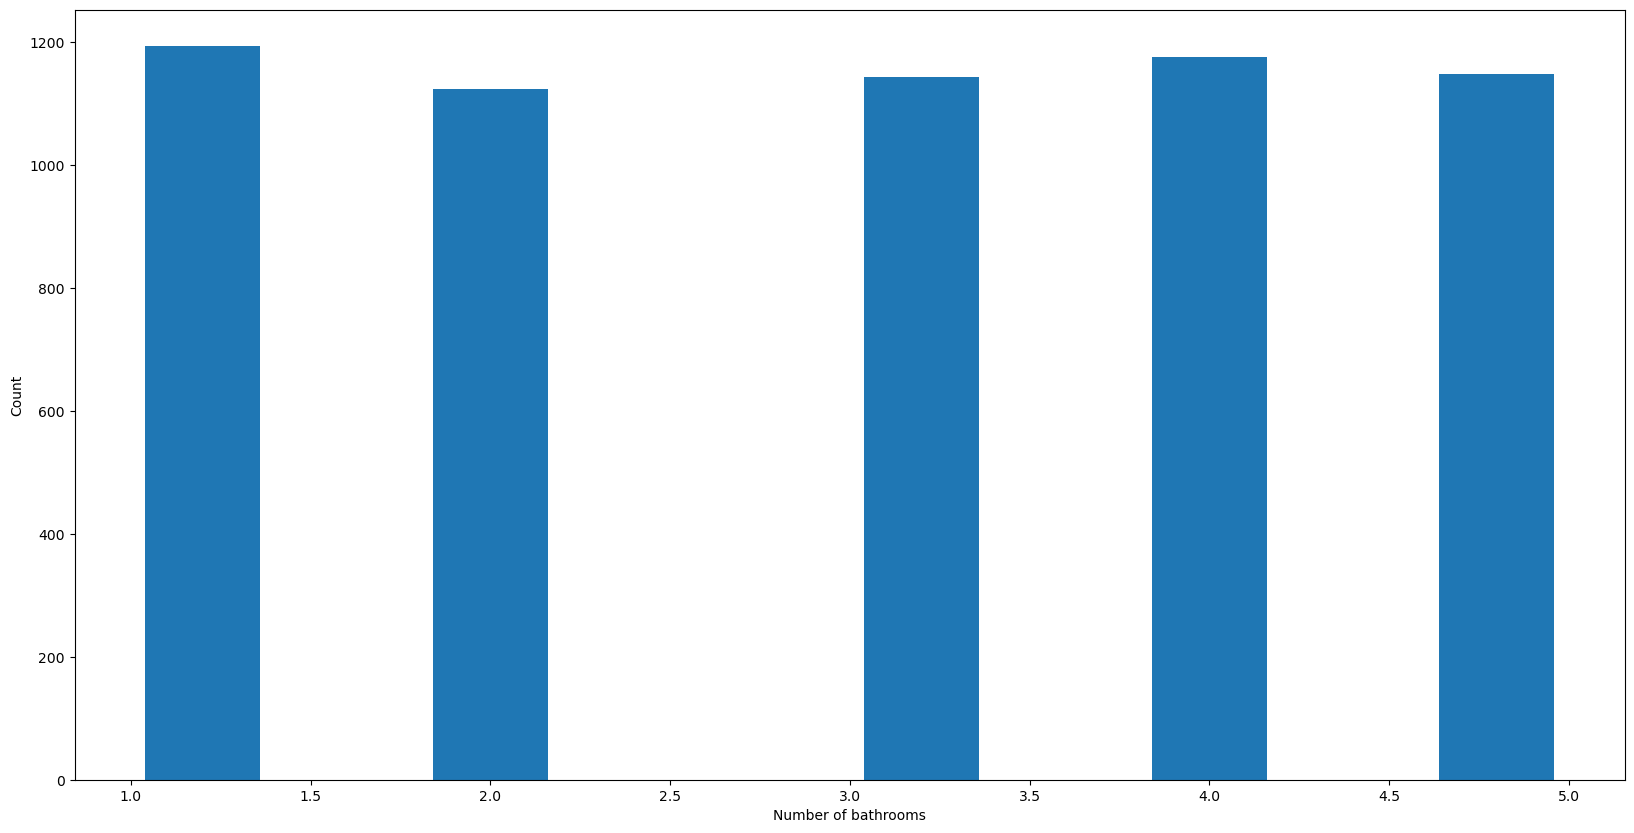

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8,Aurangpura Block 50,2 BHK,1283,5,56.06,2,4369.446610
20,Aurangpura Central 26,1 BHK,784,4,37.24,1,4750.000000
28,Aurangpura Central 58,1 BHK,628,4,25.68,1,4089.171975
45,Aurangpura Central 9,2 Bedroom,721,5,30.87,2,4281.553398
46,Aurangpura Central 9,1 BHK,632,5,32.25,1,5102.848101
...,...,...,...,...,...,...,...
7567,other,1 BHK,496,5,26.13,1,5268.145161
7576,other,1 BHK,752,5,39.68,1,5276.595745
7597,other,1 BHK,426,5,17.72,1,4159.624413
7603,other,1 BHK,646,4,36.53,1,5654.798762


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(4223, 7)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Aurangpura Block 39,1264,2,57.60,2
2,Aurangpura Block 39,1768,1,87.43,4
3,Aurangpura Block 39,1106,1,51.40,3


In [ ]:
df10.to_csv('cleaned_data.csv', index=False)


In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Aurangpura Block 39,Aurangpura Block 50,Aurangpura Central 26,Aurangpura Central 58,Aurangpura Central 59,Aurangpura Central 9,Aurangpura East 13,Aurangpura East 37,Aurangpura Enclave 46,Aurangpura Enclave 51,...,Waluj MIDC North 48,Waluj MIDC Phase 2,Waluj MIDC Phase 55,Waluj MIDC Sector 14,Waluj MIDC Sector 17,Waluj MIDC Sector 43,Waluj MIDC Sector 49,Waluj MIDC South 18,Waluj MIDC West 19,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,Aurangpura Block 39,Aurangpura Block 50,Aurangpura Central 26,Aurangpura Central 58,Aurangpura Central 59,...,Waluj MIDC North 15,Waluj MIDC North 48,Waluj MIDC Phase 2,Waluj MIDC Phase 55,Waluj MIDC Sector 14,Waluj MIDC Sector 17,Waluj MIDC Sector 43,Waluj MIDC Sector 49,Waluj MIDC South 18,Waluj MIDC West 19
0,Aurangpura Block 39,1264,2,57.60,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aurangpura Block 39,1768,1,87.43,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aurangpura Block 39,1106,1,51.40,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Aurangpura Block 39,Aurangpura Block 50,Aurangpura Central 26,Aurangpura Central 58,Aurangpura Central 59,Aurangpura Central 9,...,Waluj MIDC North 15,Waluj MIDC North 48,Waluj MIDC Phase 2,Waluj MIDC Phase 55,Waluj MIDC Sector 14,Waluj MIDC Sector 17,Waluj MIDC Sector 43,Waluj MIDC Sector 49,Waluj MIDC South 18,Waluj MIDC West 19
0,1264,2,57.60,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1768,1,87.43,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(4223, 463)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(100)

,total_sqft,bath,bhk,Aurangpura Block 39,Aurangpura Block 50,Aurangpura Central 26,Aurangpura Central 58,Aurangpura Central 59,Aurangpura Central 9,Aurangpura East 13,...,Waluj MIDC North 15,Waluj MIDC North 48,Waluj MIDC Phase 2,Waluj MIDC Phase 55,Waluj MIDC Sector 14,Waluj MIDC Sector 17,Waluj MIDC Sector 43,Waluj MIDC Sector 49,Waluj MIDC South 18,Waluj MIDC West 19
0,1264,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1768,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1106,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1727,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2667,5,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3857,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,1070,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,2473,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,1118,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df12.price
y.head()

0     57.60
2     87.43
3     51.40
4    103.88
5    126.45
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9660375759330944

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.96274683, 0.96649168, 0.96653743, 0.96283878, 0.9636611 ])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    # Convert X to DataFrame if it's not already
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {  
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)  
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores)


In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Aurangpura Block 39', 1106, 1, 3)

54.05301482822716

In [ ]:
predict_price('Aurangpura Block 39', 2106, 3, 4)

106.82795491604507

In [ ]:
predict_price('Beed Bypass Central 8',1491,3,3)

71.99410318625782

In [ ]:
predict_price('Aurangpura Block 39', 1000, 2, 2)

48.34180770485706

In [ ]:
predict_price('Beed Bypass Central 8',1000,2,2)

45.92035989589114

# export the tested model to pickle file 

In [ ]:
import pickle

with open('sambhaji_nagar_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)


In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))